In [1]:
import numpy as np, matplotlib.pyplot as plt
import sys; sys.path.append("../src2")
from pendulum import *
import pickle

(-1, 1)

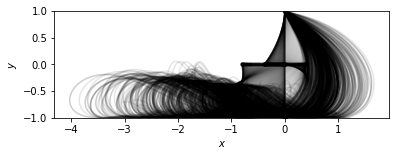

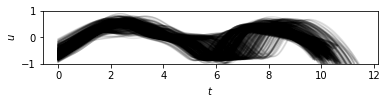

In [22]:
# load optimal control data
trajs = np.load("energy_walks_alpha.npy")
fig1, ax1 = plt.subplots(1)
plot_traj(trajs[-1][:,1:5], ax=ax1, arm=True)
ax1.set_xlabel(r"$x$")
ax1.set_ylabel(r"$y$")
fig2, ax2 = plt.subplots(1)
plot_controls(trajs[-1][:,0], trajs[-1][:,-1], ax=ax2)
ax2.set_xlabel(r"$Tau$")
ax2.set_ylabel(r"$u$")
for traj in trajs:
    t = traj[:,0]
    x = traj[:,1:5]
    u = traj[:,-1]
    plot_traj(x, ax=ax1, alpha=0.1)
    plot_controls(t, u, ax=ax2, alpha=0.1)
ax1.set_ylim(-1,1)    
ax2.set_ylim(-1,1)

In [21]:
fig1.savefig("traj_db.pdf", bbox_inches='tight')
fig2.savefig("cont_db.pdf", bbox_inches='tight')

In [14]:
# format data for neural network
db = np.vstack(trajs)
db = db[:,[1,2,3,4,-1]]
db = data(db, [0,1,2,3], [4])
db.i

tensor([[-0.1145,  0.3336,  0.1183, -0.3579],
        [-3.5019,  0.0115,  3.3905,  0.7244],
        [-0.1065,  0.5686,  4.1888,  0.4657],
        ...,
        [-0.2493,  0.2794,  0.2862, -0.4006],
        [-1.7391,  0.1301,  3.0834,  0.7885],
        [-1.6504, -0.4430,  2.8240, -0.0850]], dtype=torch.float64)

In [15]:
# instantiate neural network
#nn = mlp([4, 20, 1])

In [16]:
# train
n = 5000
nn.train(db.i[:n,:], db.o[:n,:], epo=2000, lr=1e-3, gpu=False)

Episode 0; Testing Loss 0.005324150634223359; Training Loss 0.005413258122916721
Episode 1; Testing Loss 0.005376347450317062; Training Loss 0.005407912553476999
Episode 2; Testing Loss 0.005403707694066598; Training Loss 0.005404110464500975
Episode 3; Testing Loss 0.005377908159092604; Training Loss 0.005395583641026914
Episode 4; Testing Loss 0.005376424693287133; Training Loss 0.0053935601121732945
Episode 5; Testing Loss 0.005423176947716139; Training Loss 0.005387167128343865
Episode 6; Testing Loss 0.005471854690477659; Training Loss 0.005385840295506109
Episode 7; Testing Loss 0.005461267836655393; Training Loss 0.0053797476195748435
Episode 8; Testing Loss 0.00543363987503211; Training Loss 0.00537609453550816
Episode 9; Testing Loss 0.005439880574800323; Training Loss 0.005370200635034502
Episode 10; Testing Loss 0.005467379350658392; Training Loss 0.0053655240503454734
Episode 11; Testing Loss 0.005462420981615136; Training Loss 0.00536172672803944
Episode 12; Testing Loss 0

Episode 102; Testing Loss 0.0053512646620085084; Training Loss 0.005240255060521104
Episode 103; Testing Loss 0.005350898009572367; Training Loss 0.005239487449131455
Episode 104; Testing Loss 0.005350502297615551; Training Loss 0.005238718305569375
Episode 105; Testing Loss 0.005350394937437331; Training Loss 0.00523794956298227
Episode 106; Testing Loss 0.005350297949763745; Training Loss 0.00523719220450448
Episode 107; Testing Loss 0.005350275303844996; Training Loss 0.005236428440257905
Episode 108; Testing Loss 0.0053498465920838265; Training Loss 0.005235674689819311
Episode 109; Testing Loss 0.0053494646486701375; Training Loss 0.005234930232857413
Episode 110; Testing Loss 0.005349335172683205; Training Loss 0.005234202770383816
Episode 111; Testing Loss 0.005349928615730406; Training Loss 0.005233480929364014
Episode 112; Testing Loss 0.005350228389522726; Training Loss 0.005232766729741931
Episode 113; Testing Loss 0.005350547945685017; Training Loss 0.0052320595590847185
Ep

Episode 201; Testing Loss 0.00533830306085868; Training Loss 0.0051879370106176345
Episode 202; Testing Loss 0.005338170019509685; Training Loss 0.005187561186115835
Episode 203; Testing Loss 0.005338100592591352; Training Loss 0.005187185025210482
Episode 204; Testing Loss 0.005338030287833448; Training Loss 0.005186807602358315
Episode 205; Testing Loss 0.005337953238321463; Training Loss 0.005186434603801953
Episode 206; Testing Loss 0.00533811780066866; Training Loss 0.005186060643481721
Episode 207; Testing Loss 0.005338097939625729; Training Loss 0.005185688287648719
Episode 208; Testing Loss 0.0053377880203875055; Training Loss 0.0051853154329226615
Episode 209; Testing Loss 0.005337441460674649; Training Loss 0.005184940231640094
Episode 210; Testing Loss 0.005337285742817939; Training Loss 0.005184568652062324
Episode 211; Testing Loss 0.005337114723839036; Training Loss 0.005184198285711573
Episode 212; Testing Loss 0.005336715839172623; Training Loss 0.005183829692148321
Epi

Episode 300; Testing Loss 0.005334692812512461; Training Loss 0.005158070876507035
Episode 301; Testing Loss 0.005334589178846831; Training Loss 0.005157829132309045
Episode 302; Testing Loss 0.005334765473796114; Training Loss 0.0051575878141279854
Episode 303; Testing Loss 0.005334820724209254; Training Loss 0.005157347391717416
Episode 304; Testing Loss 0.005334424034170935; Training Loss 0.00515710986623825
Episode 305; Testing Loss 0.005333971912576696; Training Loss 0.005156874580438453
Episode 306; Testing Loss 0.0053342683440032205; Training Loss 0.005156639493102732
Episode 307; Testing Loss 0.005334425681262596; Training Loss 0.005156406570316117
Episode 308; Testing Loss 0.00533373444074852; Training Loss 0.005156173273303294
Episode 309; Testing Loss 0.005332757898545606; Training Loss 0.0051559438408167865
Episode 310; Testing Loss 0.005332644482979427; Training Loss 0.00515571746254912
Episode 311; Testing Loss 0.005332986387434517; Training Loss 0.005155488844517318
Epis

Episode 399; Testing Loss 0.005327477085271993; Training Loss 0.00513740348065393
Episode 400; Testing Loss 0.005327799754221791; Training Loss 0.005137185868185926
Episode 401; Testing Loss 0.005327652932484437; Training Loss 0.005136966391040477
Episode 402; Testing Loss 0.005327268471534927; Training Loss 0.005136750931627928
Episode 403; Testing Loss 0.005327347766674586; Training Loss 0.005136536018287294
Episode 404; Testing Loss 0.005327660154915286; Training Loss 0.005136320981824483
Episode 405; Testing Loss 0.0053276286828843325; Training Loss 0.005136103829087694
Episode 406; Testing Loss 0.005327402251764103; Training Loss 0.00513589150706225
Episode 407; Testing Loss 0.005327491863086819; Training Loss 0.005135680904328084
Episode 408; Testing Loss 0.005327882506140686; Training Loss 0.0051354698369684365
Episode 409; Testing Loss 0.00532805712778605; Training Loss 0.005135262429277652
Episode 410; Testing Loss 0.005327546372730161; Training Loss 0.005135057452569344
Episo

Episode 498; Testing Loss 0.005331027966680781; Training Loss 0.0051187777121974205
Episode 499; Testing Loss 0.005330404785623705; Training Loss 0.005118614279638431
Episode 500; Testing Loss 0.005329884421992801; Training Loss 0.005118452999156563
Episode 501; Testing Loss 0.005330153482924709; Training Loss 0.005118291288394201
Episode 502; Testing Loss 0.005330840291116287; Training Loss 0.005118130397998313
Episode 503; Testing Loss 0.005330887169898086; Training Loss 0.005117968658912396
Episode 504; Testing Loss 0.0053305216689629965; Training Loss 0.005117809640962102
Episode 505; Testing Loss 0.005330905665916748; Training Loss 0.005117650866252048
Episode 506; Testing Loss 0.0053313595686538115; Training Loss 0.0051174921368600645
Episode 507; Testing Loss 0.005331584843805064; Training Loss 0.0051173346711725675
Episode 508; Testing Loss 0.005331525993083947; Training Loss 0.005117178617110238
Episode 509; Testing Loss 0.005331450892403685; Training Loss 0.005117024510946388

Episode 597; Testing Loss 0.005331988186161372; Training Loss 0.005102977927889872
Episode 598; Testing Loss 0.005332486846802431; Training Loss 0.005102839029558003
Episode 599; Testing Loss 0.005332867136375327; Training Loss 0.005102700233487402
Episode 600; Testing Loss 0.005332458165898585; Training Loss 0.005102562462116053
Episode 601; Testing Loss 0.005332500152237227; Training Loss 0.005102425049149819
Episode 602; Testing Loss 0.005332948360741042; Training Loss 0.005102288611144688
Episode 603; Testing Loss 0.005332709614055942; Training Loss 0.005102150885472748
Episode 604; Testing Loss 0.005332104576577209; Training Loss 0.0051020150056124
Episode 605; Testing Loss 0.005332148462772968; Training Loss 0.005101885080584344
Episode 606; Testing Loss 0.005332687190567685; Training Loss 0.005101752666581674
Episode 607; Testing Loss 0.005332830452439595; Training Loss 0.0051016239738652545
Episode 608; Testing Loss 0.0053320989413000565; Training Loss 0.005101494844111909
Epis

Episode 696; Testing Loss 0.00532550392833432; Training Loss 0.005091742407999761
Episode 697; Testing Loss 0.0053256535199469775; Training Loss 0.005091645100100466
Episode 698; Testing Loss 0.0053256201592618985; Training Loss 0.00509154835253623
Episode 699; Testing Loss 0.005325288476261664; Training Loss 0.00509145171633919
Episode 700; Testing Loss 0.005325298155784839; Training Loss 0.0050913557606278885
Episode 701; Testing Loss 0.005325561525011781; Training Loss 0.005091258687388492
Episode 702; Testing Loss 0.005325621348843533; Training Loss 0.005091162372544672
Episode 703; Testing Loss 0.00532554870525459; Training Loss 0.005091066493509026
Episode 704; Testing Loss 0.005325537520797515; Training Loss 0.005090970575901712
Episode 705; Testing Loss 0.0053253817030615045; Training Loss 0.005090873828806485
Episode 706; Testing Loss 0.005325610129491875; Training Loss 0.005090778537749201
Episode 707; Testing Loss 0.005325566882126075; Training Loss 0.005090682501581398
Epis

Episode 797; Testing Loss 0.005327360589360013; Training Loss 0.005082739193561347
Episode 798; Testing Loss 0.005327232326733662; Training Loss 0.005082656023722701
Episode 799; Testing Loss 0.005327384917425449; Training Loss 0.005082573850303222
Episode 800; Testing Loss 0.005327563295846275; Training Loss 0.005082492371420454
Episode 801; Testing Loss 0.005327531294846377; Training Loss 0.0050824113085977275
Episode 802; Testing Loss 0.005327757923852398; Training Loss 0.005082331458912077
Episode 803; Testing Loss 0.005327760346634709; Training Loss 0.005082248716679405
Episode 804; Testing Loss 0.005328075964270117; Training Loss 0.005082166706911149
Episode 805; Testing Loss 0.005328344706572252; Training Loss 0.005082085082721043
Episode 806; Testing Loss 0.0053282343063960095; Training Loss 0.005082003994077735
Episode 807; Testing Loss 0.005327932504542839; Training Loss 0.005081923434978175
Episode 808; Testing Loss 0.0053280702801962515; Training Loss 0.005081841531323214
E

Episode 896; Testing Loss 0.0053332466336976254; Training Loss 0.00507430370820854
Episode 897; Testing Loss 0.005333524662372052; Training Loss 0.005074223639773899
Episode 898; Testing Loss 0.005333279635295626; Training Loss 0.0050741429729596384
Episode 899; Testing Loss 0.005333106987800503; Training Loss 0.0050740639691406
Episode 900; Testing Loss 0.005333171872377294; Training Loss 0.005073984497087652
Episode 901; Testing Loss 0.0053335236828239065; Training Loss 0.005073904386670395
Episode 902; Testing Loss 0.005333629823045384; Training Loss 0.005073825228521274
Episode 903; Testing Loss 0.005333859821077544; Training Loss 0.005073745466767893
Episode 904; Testing Loss 0.005334126511059835; Training Loss 0.005073666497710749
Episode 905; Testing Loss 0.005334297596710727; Training Loss 0.005073587954487617
Episode 906; Testing Loss 0.005334335245149699; Training Loss 0.0050735088084194425
Episode 907; Testing Loss 0.0053344171974589304; Training Loss 0.005073431750882076
Ep

Episode 997; Testing Loss 0.005339053401353291; Training Loss 0.005066962218480023
Episode 998; Testing Loss 0.005339065354356382; Training Loss 0.005066893203515626
Episode 999; Testing Loss 0.005339195776519312; Training Loss 0.005066824816974277
Episode 1000; Testing Loss 0.005339346938828671; Training Loss 0.00506675658121244
Episode 1001; Testing Loss 0.005339442443550811; Training Loss 0.005066689160281393
Episode 1002; Testing Loss 0.005339896725326551; Training Loss 0.005066621029823785
Episode 1003; Testing Loss 0.005340356930799501; Training Loss 0.005066553344218125
Episode 1004; Testing Loss 0.005340435395849923; Training Loss 0.005066485256686397
Episode 1005; Testing Loss 0.005340224607312839; Training Loss 0.005066417825800521
Episode 1006; Testing Loss 0.005340005973981691; Training Loss 0.005066349862029914
Episode 1007; Testing Loss 0.005340037494121491; Training Loss 0.0050662809210438526
Episode 1008; Testing Loss 0.005340347020269519; Training Loss 0.00506621320151

Episode 1097; Testing Loss 0.005340395828087938; Training Loss 0.005060526580552457
Episode 1098; Testing Loss 0.005341099656234855; Training Loss 0.0050604652882171915
Episode 1099; Testing Loss 0.005340978242234895; Training Loss 0.005060404142958064
Episode 1100; Testing Loss 0.005340394171191658; Training Loss 0.005060342571806244
Episode 1101; Testing Loss 0.005340144303639455; Training Loss 0.005060281121532457
Episode 1102; Testing Loss 0.0053406042313106665; Training Loss 0.005060219414140489
Episode 1103; Testing Loss 0.005340880881689554; Training Loss 0.005060157651036873
Episode 1104; Testing Loss 0.005340699595079296; Training Loss 0.0050600949319600545
Episode 1105; Testing Loss 0.005340756417889536; Training Loss 0.00506003339153174
Episode 1106; Testing Loss 0.005340985880995065; Training Loss 0.005059971373466554
Episode 1107; Testing Loss 0.005341183937895843; Training Loss 0.005059910120093561
Episode 1108; Testing Loss 0.005340824173828144; Training Loss 0.005059848

Episode 1196; Testing Loss 0.005342243796787113; Training Loss 0.005054676597342079
Episode 1197; Testing Loss 0.005343133883001691; Training Loss 0.005054620640452214
Episode 1198; Testing Loss 0.0053426833619852655; Training Loss 0.00505456244292184
Episode 1199; Testing Loss 0.005342008978027544; Training Loss 0.0050545076144179624
Episode 1200; Testing Loss 0.005342575930710896; Training Loss 0.005054450463462577
Episode 1201; Testing Loss 0.005343427841187401; Training Loss 0.005054394911099208
Episode 1202; Testing Loss 0.0053433540291837976; Training Loss 0.005054338948594196
Episode 1203; Testing Loss 0.005342412038294331; Training Loss 0.005054283540727572
Episode 1204; Testing Loss 0.005342509637002329; Training Loss 0.00505422755355173
Episode 1205; Testing Loss 0.005342916009407479; Training Loss 0.005054172376127917
Episode 1206; Testing Loss 0.005343057603368844; Training Loss 0.005054117035548862
Episode 1207; Testing Loss 0.0053427501541455395; Training Loss 0.005054061

Episode 1295; Testing Loss 0.00534561686067987; Training Loss 0.0050494637647770305
Episode 1296; Testing Loss 0.005345362096056542; Training Loss 0.005049414476073574
Episode 1297; Testing Loss 0.0053457187812160105; Training Loss 0.005049366275990778
Episode 1298; Testing Loss 0.005345703786078865; Training Loss 0.0050493165437076595
Episode 1299; Testing Loss 0.005345518239707756; Training Loss 0.005049268133278866
Episode 1300; Testing Loss 0.005345803427222197; Training Loss 0.0050492193131641975
Episode 1301; Testing Loss 0.005346048683946585; Training Loss 0.005049171124064548
Episode 1302; Testing Loss 0.005345694547065308; Training Loss 0.005049122090827498
Episode 1303; Testing Loss 0.005345101417407915; Training Loss 0.005049075157938193
Episode 1304; Testing Loss 0.005345606595048206; Training Loss 0.005049026475687374
Episode 1305; Testing Loss 0.005346269305203219; Training Loss 0.0050489782408810425
Episode 1306; Testing Loss 0.005346079259789452; Training Loss 0.0050489

Episode 1394; Testing Loss 0.005346998099315729; Training Loss 0.005044877510093085
Episode 1395; Testing Loss 0.005346890105857013; Training Loss 0.005044833937574241
Episode 1396; Testing Loss 0.005346812989836266; Training Loss 0.005044790028106516
Episode 1397; Testing Loss 0.0053474706036876875; Training Loss 0.005044747452514387
Episode 1398; Testing Loss 0.0053471532605947; Training Loss 0.005044701950920504
Episode 1399; Testing Loss 0.005346927278284288; Training Loss 0.005044658764405343
Episode 1400; Testing Loss 0.005346435266278211; Training Loss 0.005044616171636718
Episode 1401; Testing Loss 0.005347148364782697; Training Loss 0.00504457061988484
Episode 1402; Testing Loss 0.005347215541651321; Training Loss 0.005044528003226886
Episode 1403; Testing Loss 0.005346920522853111; Training Loss 0.005044485427108221
Episode 1404; Testing Loss 0.005346859809605502; Training Loss 0.005044440292358565
Episode 1405; Testing Loss 0.005346981116078578; Training Loss 0.0050443997215

Episode 1493; Testing Loss 0.005344932458873833; Training Loss 0.005040415771644124
Episode 1494; Testing Loss 0.005345280817938922; Training Loss 0.005040356093882919
Episode 1495; Testing Loss 0.005346097508774993; Training Loss 0.005040300901789498
Episode 1496; Testing Loss 0.005345380526086819; Training Loss 0.005040242277065477
Episode 1497; Testing Loss 0.0053449912915180505; Training Loss 0.00504018578678503
Episode 1498; Testing Loss 0.005345515175767779; Training Loss 0.005040130628474105
Episode 1499; Testing Loss 0.00534619561193852; Training Loss 0.005040077720947987
Episode 1500; Testing Loss 0.0053456216436143025; Training Loss 0.005040020169369437
Episode 1501; Testing Loss 0.00534469252998839; Training Loss 0.005039961939572557
Episode 1502; Testing Loss 0.005344284672656324; Training Loss 0.005039906323807409
Episode 1503; Testing Loss 0.005344892274264674; Training Loss 0.005039850911130277
Episode 1504; Testing Loss 0.0053448794230558485; Training Loss 0.00503979727

Episode 1591; Testing Loss 0.0053465109918728135; Training Loss 0.0050356009126305236
Episode 1592; Testing Loss 0.005346765442271931; Training Loss 0.00503555632888325
Episode 1593; Testing Loss 0.005346602464863291; Training Loss 0.0050355111805139375
Episode 1594; Testing Loss 0.005347083955548664; Training Loss 0.005035465413873557
Episode 1595; Testing Loss 0.00534706011426493; Training Loss 0.005035422138701839
Episode 1596; Testing Loss 0.005346194179209387; Training Loss 0.0050353772340246475
Episode 1597; Testing Loss 0.005346615459816193; Training Loss 0.005035330725860692
Episode 1598; Testing Loss 0.005347329496866139; Training Loss 0.0050352906836087395
Episode 1599; Testing Loss 0.005346148028112418; Training Loss 0.005035241326299841
Episode 1600; Testing Loss 0.005345531743765219; Training Loss 0.0050352010207814
Episode 1601; Testing Loss 0.005347000010891607; Training Loss 0.005035152703885257
Episode 1602; Testing Loss 0.005347755252023558; Training Loss 0.0050351143

Episode 1690; Testing Loss 0.005349517668184214; Training Loss 0.0050313352476502975
Episode 1691; Testing Loss 0.005348817171545409; Training Loss 0.005031293061323835
Episode 1692; Testing Loss 0.005347446251784672; Training Loss 0.005031251612289367
Episode 1693; Testing Loss 0.0053476228428885365; Training Loss 0.005031205645981503
Episode 1694; Testing Loss 0.005348848097870985; Training Loss 0.00503116635777183
Episode 1695; Testing Loss 0.005348174433318532; Training Loss 0.005031124833722442
Episode 1696; Testing Loss 0.005346898505767814; Training Loss 0.005031084562572126
Episode 1697; Testing Loss 0.005347460533590892; Training Loss 0.005031043221967108
Episode 1698; Testing Loss 0.0053491059378583325; Training Loss 0.005031002468730013
Episode 1699; Testing Loss 0.005348952675447767; Training Loss 0.005030961863635358
Episode 1700; Testing Loss 0.005347844968898318; Training Loss 0.0050309228370286055
Episode 1701; Testing Loss 0.005347918251988783; Training Loss 0.00503088

Episode 1789; Testing Loss 0.005349225507322937; Training Loss 0.005027468435965038
Episode 1790; Testing Loss 0.005348720149700641; Training Loss 0.005027427522415905
Episode 1791; Testing Loss 0.005348669123082844; Training Loss 0.005027391419536161
Episode 1792; Testing Loss 0.005348953502356292; Training Loss 0.005027348695737626
Episode 1793; Testing Loss 0.00534898559796774; Training Loss 0.005027312876793678
Episode 1794; Testing Loss 0.005349341180338549; Training Loss 0.005027274956483127
Episode 1795; Testing Loss 0.005349275561330618; Training Loss 0.0050272342195931815
Episode 1796; Testing Loss 0.00534894066904119; Training Loss 0.005027191243906276
Episode 1797; Testing Loss 0.005348386729493036; Training Loss 0.005027152912792702
Episode 1798; Testing Loss 0.0053478797450765185; Training Loss 0.005027112733408384
Episode 1799; Testing Loss 0.005348277958335961; Training Loss 0.00502706798814928
Episode 1800; Testing Loss 0.005349044776510611; Training Loss 0.005027030425

Episode 1888; Testing Loss 0.005348890917486191; Training Loss 0.005023565382019024
Episode 1889; Testing Loss 0.005349705583240871; Training Loss 0.005023527385903061
Episode 1890; Testing Loss 0.005349587918119802; Training Loss 0.005023488730344447
Episode 1891; Testing Loss 0.005348404510421373; Training Loss 0.005023452206760443
Episode 1892; Testing Loss 0.00534908832252357; Training Loss 0.0050234114779031565
Episode 1893; Testing Loss 0.0053499371213324804; Training Loss 0.005023375349311388
Episode 1894; Testing Loss 0.005349513480449329; Training Loss 0.0050233357805393565
Episode 1895; Testing Loss 0.005348436623840986; Training Loss 0.005023297037016618
Episode 1896; Testing Loss 0.005348237488118406; Training Loss 0.005023258232404696
Episode 1897; Testing Loss 0.00534907244432914; Training Loss 0.0050232228203361965
Episode 1898; Testing Loss 0.005349390674425955; Training Loss 0.005023184408775112
Episode 1899; Testing Loss 0.005348690036608102; Training Loss 0.005023144

Episode 1986; Testing Loss 0.005351489063841097; Training Loss 0.005019895160824517
Episode 1987; Testing Loss 0.00535052923927585; Training Loss 0.0050198561418198576
Episode 1988; Testing Loss 0.005349737015255396; Training Loss 0.00501982244946839
Episode 1989; Testing Loss 0.005349603235220025; Training Loss 0.005019787451681746
Episode 1990; Testing Loss 0.005350127379594055; Training Loss 0.00501974715718582
Episode 1991; Testing Loss 0.005350786745080357; Training Loss 0.005019712723088655
Episode 1992; Testing Loss 0.0053504930764304215; Training Loss 0.005019674175899111
Episode 1993; Testing Loss 0.005350163032237763; Training Loss 0.005019641201855322
Episode 1994; Testing Loss 0.00535042410390158; Training Loss 0.005019601917330884
Episode 1995; Testing Loss 0.0053511338932162285; Training Loss 0.0050195644942581
Episode 1996; Testing Loss 0.0053522957253497785; Training Loss 0.005019532948602643
Episode 1997; Testing Loss 0.0053521068104847745; Training Loss 0.005019494367

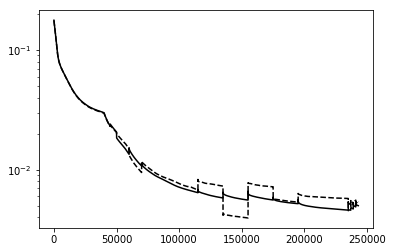

In [25]:
# plot loss
fig, ax = plt.subplots(1)
ax.plot(nn.ltst, "k--")
ax.plot(nn.ltrn, "k-")
ax.set_yscale('log')

In [26]:
# instantiate controller
cont = mlp_controller(nn)

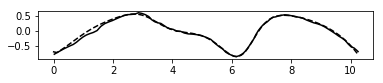

In [27]:
fig, ax = plt.subplots(1)
ax.plot(traj[:,0], traj[:,-1], "k--")
ax.plot(traj[:,0], cont.predict(traj[:,1:5]), "k-")
ax.set_aspect("equal")

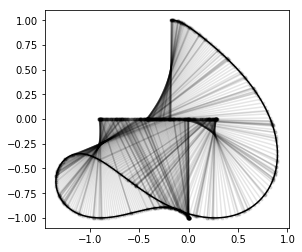

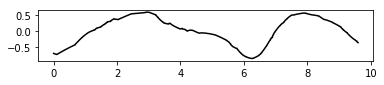

In [28]:
# simulate with neural network control
x0 = [0,0,np.pi,0]
dyn  = dynamics(x0,[0,0,0,0], 0)
t, x, u = dyn.propagate_controlled(9.6, cont)
ax = plot_traj(x, arm=True, n=500)
ax = plot_controls(t, u)

In [ ]:
#pickle.dump(nn, open("nn.p", "wb"))

In [4]:
nn = pickle.load(open("nn.p", "rb"))

In [ ]:
%matplotlib

In [ ]:
nn.train = mlp.train

In [ ]:
nn.train

In [16]:
res

NameError: name 'res' is not defined

In [19]:
np.vstack((trajs)).shape

(354918, 10)